In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl
from sklearn.cluster import KMeans
from fase2_funciones import *


In [17]:
df_bd_preprocesada = pd.read_csv('BD/OnlineRetail_Preprocesada.csv', sep=',', encoding = 'unicode_escape')
df_pivot = df_bd_preprocesada['InvoiceDate'].str.split(expand = True)
df_pivot.rename(columns = {0: 'Fecha', 1: 'Hora'}, inplace=True)
df_bd_preprocesada = df_bd_preprocesada.drop(columns =['Unnamed: 0','InvoiceDate'])
df_bd_preprocesada = pd.concat([df_bd_preprocesada,df_pivot], axis = 1)
df_bd_preprocesada['Monto'] = df_bd_preprocesada['UnitPrice'] * df_bd_preprocesada['Quantity']
df_bd_preprocesada_new = df_bd_preprocesada
df_bd_preprocesada_new

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Fecha,Hora,Monto
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,12/1/2010,8:26,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,12/1/2010,8:26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,12/1/2010,8:26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,12/1/2010,8:26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,12/1/2010,8:26,20.34
...,...,...,...,...,...,...,...,...,...,...
392727,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,12/9/2011,12:50,10.20
392728,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,12/9/2011,12:50,12.60
392729,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,12/9/2011,12:50,16.60
392730,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,12/9/2011,12:50,16.60


In [21]:
df_bd_aux=df_bd_preprocesada_new.drop(['StockCode','Description','Country','Fecha','Hora'],axis=1)
df_bd_Normalizada = (df_bd_aux-df_bd_aux.min())/(df_bd_aux.max()-df_bd_aux.min())
df_bd_Normalizada.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,Monto
count,392732.000000,392732.000000,392732.000000,392732.000000,392732.000000
mean,0.535714,0.000150,0.000384,0.495158,0.000134
std,0.289397,0.002242,0.002731,0.288431,0.001847
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.284574,0.000012,0.000154,0.270830,0.000029
50%,0.564084,0.000062,0.000239,0.471974,0.000074
75%,0.789350,0.000136,0.000461,0.748191,0.000118
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
wcss = []

for i in range (1,11):
    kmeans = KMeans(n_clusters = i, max_iter=300)
    kmeans.fit(df_bd_Normalizada)
    wcss.append(kmeans.inertia_)

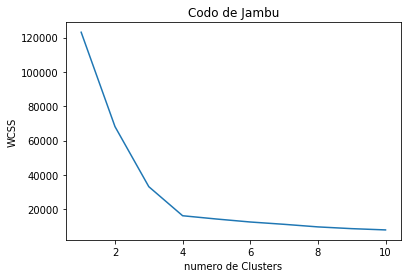

In [29]:
plt.plot(range(1,11),wcss)
plt.title("Codo de Jambu")
plt.xlabel("numero de Clusters")
plt.ylabel("WCSS")
plt.show()

In [10]:
from sklearn.decomposition import PCA #analisis de componentes principales
pca = PCA(n_components=2)
pca.fit(df_bd_Normalizada)
X_reduced = pca.transform(df_bd_Normalizada)
print("Reduced dataset shape:", X_reduced.shape)


Reduced dataset shape: (392732, 2)


In [13]:
clustering = KMeans(n_clusters = 4, max_iter=300)
clustering.fit(df_bd_Normalizada)
centroides = clustering.cluster_centers_
etiquetas = clustering.labels_

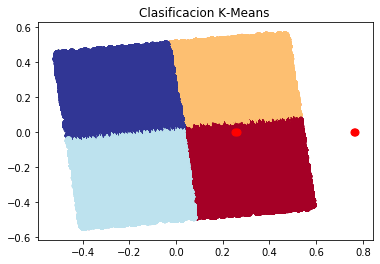

In [16]:
y_pred = clustering.predict(df_bd_Normalizada)


pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred,
           cmap='RdYlBu'); 
pl.scatter(centroides[:, 0], centroides[:, 1], c='red',s=50)
plt.title('Clasificacion K-Means ')
plt.show()